Objective:
This project analyzes how hospital costs, patient readmissions, and other key factors influence patient outcomes and satisfaction levels. The goal is to determine if higher hospital expenses correlate with better patient recovery or if they negatively impact satisfaction.

Dataset Overview:
The dataset consists of 984 patient records with the following key fields:

Cost – Total expenses incurred per patient.
Outcome – Whether the patient Recovered (1) or remained Stable (0).
Readmission – Whether the patient was readmitted after discharge.
Satisfaction Score – Patient's rating of hospital services (scale 1-5).
Length of Stay – The total number of days the patient was hospitalized.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

# Load dataset (replace 'your_data.csv' with actual filename)
df = pd.read_csv("D:\Projects\Our projects for CV\Cost Vs Outcome Analysis\hospital data analysis.csv")

# Display first few rows
df.head()


<>:9: SyntaxWarning: invalid escape sequence '\P'
<>:9: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Admin\AppData\Local\Temp\ipykernel_15104\194408059.py:9: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\Projects\Our projects for CV\Cost Vs Outcome Analysis\hospital data analysis.csv")


,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4


In [9]:
# Check for missing values in each column
df.isnull().sum()


Patient_ID        0
Age               0
Gender            0
Condition         0
Procedure         0
Cost              0
Length_of_Stay    0
Readmission       0
Outcome           0
Satisfaction      0
dtype: int64

In [11]:
# Summary statistics of numerical columns
df.describe()


,Patient_ID,Age,Cost,Length_of_Stay,Satisfaction
count,984.000000,984.000000,984.000000,984.000000,984.000000
mean,500.329268,53.754065,8367.479675,37.663618,3.598577
std,288.979531,14.941135,7761.990976,19.595805,0.883002
min,1.000000,25.000000,100.000000,1.000000,2.000000
25%,250.750000,45.000000,1000.000000,21.000000,3.000000
50%,500.500000,55.000000,6000.000000,38.000000,4.000000
75%,750.250000,65.000000,15000.000000,54.250000,4.000000
max,1000.000000,78.000000,25000.000000,76.000000,5.000000


In [15]:
# Check data types of each column
df.dtypes


Patient_ID         int64
Age                int64
Gender            object
Condition         object
Procedure         object
Cost               int64
Length_of_Stay     int64
Readmission       object
Outcome           object
Satisfaction       int64
dtype: object

In [17]:
# Convert Readmission ('No' → 0, 'Yes' → 1)
df['Readmission'] = df['Readmission'].map({'No': 0, 'Yes': 1})

# Convert Outcome into numeric (modify according to your dataset)
df['Outcome'] = df['Outcome'].map({'Poor': 0, 'Average': 1, 'Good': 2, 'Excellent': 3})


In [19]:
# Convert categorical variables into dummy/one-hot encoding
df = pd.get_dummies(df, columns=['Gender', 'Condition', 'Procedure'], drop_first=True)


In [21]:
# Check data types again
df.dtypes


Patient_ID                                          int64
Age                                                 int64
Cost                                                int64
Length_of_Stay                                      int64
Readmission                                         int64
Outcome                                           float64
Satisfaction                                        int64
Gender_Male                                          bool
Condition_Appendicitis                               bool
Condition_Cancer                                     bool
Condition_Childbirth                                 bool
Condition_Diabetes                                   bool
Condition_Fractured Arm                              bool
Condition_Fractured Leg                              bool
Condition_Heart Attack                               bool
Condition_Heart Disease                              bool
Condition_Hypertension                               bool
Condition_Kidn

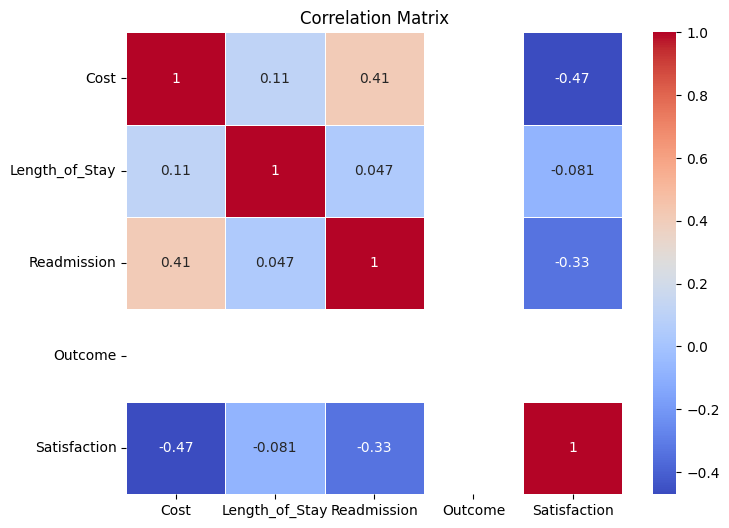

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df[['Cost', 'Length_of_Stay', 'Readmission', 'Outcome', 'Satisfaction']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [25]:
import numpy as np
from scipy import stats

# Find median cost
median_cost = df['Cost'].median()

# Split into two groups
low_cost = df[df['Cost'] <= median_cost]['Satisfaction']
high_cost = df[df['Cost'] > median_cost]['Satisfaction']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(low_cost, high_cost, equal_var=False)

# Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H₀: Higher hospital costs significantly lower satisfaction.")
else:
    print("Fail to reject H₀: No significant impact of cost on satisfaction.")


T-statistic: 21.2586
P-value: 0.0000
Reject H₀: Higher hospital costs significantly lower satisfaction.


In [31]:
print(df['Readmission'].value_counts())



Readmission
0    720
1    264
Name: count, dtype: int64


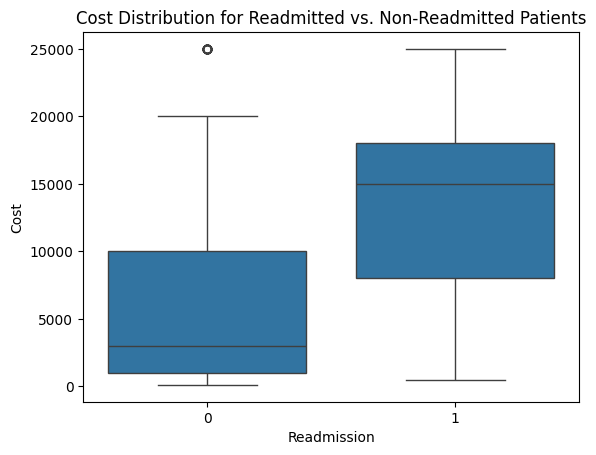

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of cost vs. readmission
sns.boxplot(x=df['Readmission'], y=df['Cost'])
plt.title("Cost Distribution for Readmitted vs. Non-Readmitted Patients")
plt.show()
